In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mgarch

plt.style.use("bmh")

[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

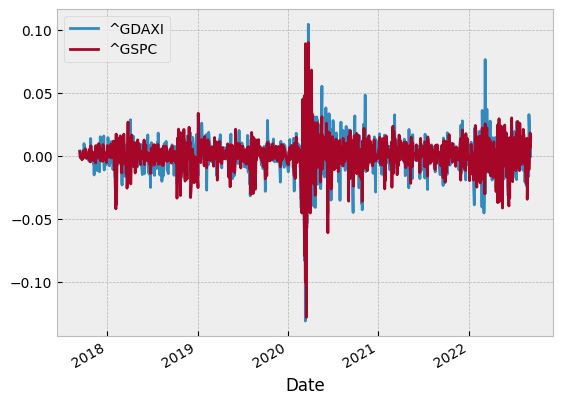

In [7]:

data = yf.download("^GDAXI ^GSPC", start="2017-09-10", end="2022-09-10", interval="1d")
close = data["Close"]
returns = np.log(close).diff().dropna()

returns.plot()

In [8]:
vol = mgarch.mgarch()
vol.fit(returns)

{'mu': matrix([[8.46886425e-05, 3.92943307e-04]]),
 'alpha': 7.046076716896288e-05,
 'beta': 0.6423740959040245}

In [10]:
prediction_steps = 10
cov_nextday = vol.predict(prediction_steps)

cov_nextday

{'dist': 'norm',
 'cov': array([[3.30746154e-04, 5.63652978e-05],
        [5.63652978e-05, 2.66724902e-04]])}

In [11]:
cov_nextday["cov"]

array([[3.30746154e-04, 5.63652978e-05],
       [5.63652978e-05, 2.66724902e-04]])